In [2]:
import sys
from pymoc.modules import Psi_Thermwind
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# buoyancy profile in the basin:
def b_basin(z):
  return 0.03 * np.exp(z / 300.) - 0.000

In [4]:
z = np.asarray(np.linspace(-4000, 0, 100))

In [6]:
m = Psi_Thermwind(z=z, b1=b_basin)

In [7]:
print(m)

In [8]:
m.solve()

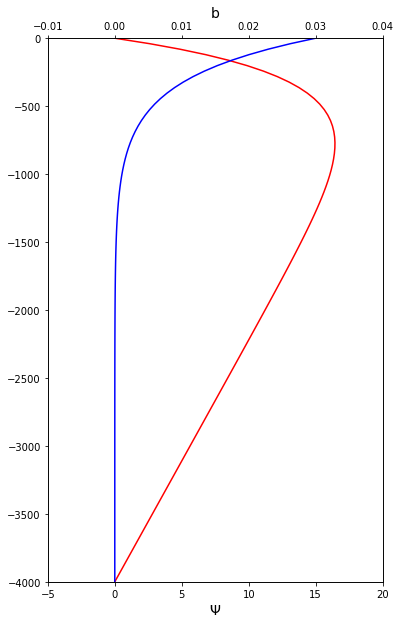

In [9]:
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.plot(b_basin(m.z), m.z, color='b')
ax1.plot(m.Psi, m.z, color='r')
plt.ylim((-4e3, 0))
ax1.set_xlim((-5, 20))
ax2.set_xlim((-0.01, 0.04))
ax1.set_xlabel('$\Psi$', fontsize=14)
ax2.set_xlabel('b', fontsize=14)
plt.show()